In [2]:
#Some installations will be needed in order to run this code

import numpy as np
import matplotlib.pyplot as plt
#from geopy.distance import great_circle

import pandas as pd      #Package for handling large data structures
import geopandas as gpd  #Package for handling geospatial data

In [269]:
df_M = pd.read_csv(r"Montreal_all.csv")

In [4]:
df_SR_ones = pd.read_csv(r"SR_ones.csv")

/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/3706356992.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SR_ones = pd.read_csv(r"SR_ones.csv")


In [5]:
df_SR_2to10 = pd.read_csv(r"SR_2to10.csv")

/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/4289763006.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SR_2to10 = pd.read_csv(r"SR_2to10.csv")


In [10]:
df_SR_over10 = pd.read_csv(r"SR_over10.csv")

/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/2045389388.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SR_over10 = pd.read_csv(r"SR_over10.csv")


In [92]:
df_SR_new = pd.read_csv(r"SR_new.csv")

In [ ]:
Montreal = [2149, 6224, 9633, 12088, 13415, 14307, 15337, 16386, 17707, 19375, 21132, 21745, 22161, 22247, 22408, 23176, 24059, 25243, 26197, 27766, 28993, 30777, 32613, 34957, 36928, 39642, 42006, 44817, 47718, 51213, 54232, 57785, 59514, 62659, 65328, 68640, 70717, 73579, 75932, 77241, 80358, 81265, 82114, 83863, 83796, 84531, 85071, 85456, 85464, 85222, 84738, 82974, 81362, 80259, 78360, 76227, 74562, 72387, 69313, 66875, 64236, 62247, 59279, 56424, 54279, 52163, 49665, 46739, 44796, 43031, 40726, 38623, 36444, 35107, 32939, 31423, 29808, 28078, 26760, 25337, 23835, 22442, 21219, 20133, 19173, 18229, 17391, 16308, 15103, 14669, 13822, 12932, 12056, 11450, 10843, 10043, 9477, 8830, 8288, 7954, 7327, 6944, 6433, 5955, 5753, 5249, 4876, 4530, 4292, 3964, 3632, 3424, 3205, 2925, 2699, 2415, 2218, 2058, 1904, 1911, 1694, 1579, 1397, 1237, 1113, 1073, 1006, 921, 860, 799, 736, 662, 620, 569, 527, 516, 416, 383, 367, 320, 292, 294, 266, 199, 202, 175, 163, 142, 142, 122, 108, 105, 94, 82, 99, 94, 82, 62, 52, 57, 36, 50, 37, 29, 27, 33, 28, 22, 28, 19, 24, 28, 14, 24, 20, 16, 22, 16, 16, 20, 14, 34, 24, 22, 19, 23, 38, 33, 30, 40, 45, 59, 73, 68, 74, 55, 140, 131, 85, 3]

## Clean up

Here we remove 
* velocities over 20 m/s
* edges over 200 meter
* edges shorter than 0.1 meter

the last two is only done on the "old" SR dadta 

In [270]:
df_M = df_M.drop(df_M[df_M["vel"] >= 20].index)
df_M = df_M.dropna()
df_SR_2to10 = df_SR_2to10.drop(df_SR_2to10[df_SR_2to10["av_speed_ms"] >= 20].index)
df_SR_ones = df_SR_ones.drop(df_SR_ones[df_SR_ones["av_speed_ms"] >= 20].index)
df_SR_over10 = df_SR_over10.drop(df_SR_over10[df_SR_over10["av_speed_ms"] >= 20].index)



df_SR_2to10 = df_SR_2to10.drop(df_SR_2to10[df_SR_2to10["length"] >= 200].index)
df_SR_ones = df_SR_ones.drop(df_SR_ones[df_SR_ones["length"] >= 200].index)
df_SR_over10 = df_SR_over10.drop(df_SR_over10[df_SR_over10["length"] >= 200].index)



df_SR_2to10 = df_SR_2to10.drop(df_SR_2to10[df_SR_2to10["length"] <= 0.1].index)
df_SR_ones = df_SR_ones.drop(df_SR_ones[df_SR_ones["length"] <= 0.1].index)
df_SR_over10 = df_SR_over10.drop(df_SR_over10[df_SR_over10["length"] <= 0.1].index)

In [152]:
df_SR_new

,id,speed,speed_smooth,distance,distance_smooth,driving_mode,acc,acc_smooth,bin_01_ms
0,1283670,5.33,5.968198,5.266176,5.977397,2,0.081485,0.049277,60
1,1283671,4.92,6.034601,4.857946,6.049466,2,0.066403,0.050033,61
2,1283672,5.38,6.076454,5.558532,6.093157,2,0.041853,0.046267,61
3,1283673,5.92,6.096132,6.133739,6.110253,2,0.019679,0.031601,61
4,1283674,6.17,6.118046,6.135064,6.127080,2,0.021913,0.035022,62
...,...,...,...,...,...,...,...,...,...
179651,532027,3.99,4.214349,4.135874,4.228054,1,0.160414,0.103484,43
179652,532028,3.63,4.298365,3.931403,4.307795,1,0.084017,0.114038,43
179653,532029,3.53,4.440216,3.982328,4.449365,1,0.141850,0.120334,45
179654,532030,3.58,4.548337,3.915462,4.553087,1,0.108121,0.103932,46


## Initial plot for comparison
all data has been assigned into 0.1 m/s velocity-bins, so this will be used for plotting
(we can also add/use other bin-sizes)

In [271]:
#Here we simply set the bin-sizes for the average speed
M_var = "vel"  
group_name = "bin_ms"
SR_var = "av_speed_ms"
new_var = "speed_smooth"


#set the edges of the bins
bin_edges = [-np.inf]
for i in range(1,201):
    bin_edges.append(i/10)
bin_edges.append(np.inf)

#name the bins (should be one less than bin_edges)
bin_labels = []
for k in range(0,201):
    bin_labels.append(k)


# This part does the grouping based on the input above
df_M[group_name] = pd.cut(
    df_M[M_var],
    bins=bin_edges,
    labels=bin_labels,
    right=True)  # Wheter to include the right edge in group or not


# This part does the grouping based on the input above
df_SR_ones[group_name] = pd.cut(
    df_SR_ones[SR_var],
    bins=bin_edges,
    labels=bin_labels,
    right=True)  # Wheter to include the right edge in group or not
# This part does the grouping based on the input above

# This part does the grouping based on the input above
df_SR_2to10[group_name] = pd.cut(
    df_SR_2to10[SR_var],
    bins=bin_edges,
    labels=bin_labels,
    right=True)  # Wheter to include the right edge in group or not
# This part does the grouping based on the input above

# This part does the grouping based on the input above
df_SR_over10[group_name] = pd.cut(
    df_SR_over10[SR_var],
    bins=bin_edges,
    labels=bin_labels,
    right=True)  # Wheter to include the right edge in group or not
# This part does the grouping based on the input above

# This part does the grouping based on the input above
df_SR_new[group_name] = pd.cut(
    df_SR_new[new_var],
    bins=bin_edges,
    labels=bin_labels,
    right=True)  # Wheter to include the right edge in group or not
# This part does the grouping based on the input above


In [272]:
group_name = "bin_ms"
rename_col = {"length":"count"}
M_agg = {"length": "count"}
SR_agg = {"length": "count", "duration": "sum"}

rename_new = {"distance":"count"}
new_agg = {"distance": "count"}

M_histo = df_M.groupby(group_name).agg(M_agg).rename(columns=rename_col)
SR_2to10_histo = df_SR_2to10.groupby(group_name).agg(SR_agg).rename(columns=rename_col)
SR_ones_histo = df_SR_ones.groupby(group_name).agg(SR_agg).rename(columns=rename_col)
SR_over10_histo = df_SR_over10.groupby(group_name).agg(SR_agg).rename(columns=rename_col)

SR_new_histo = df_SR_new.groupby(group_name).agg(new_agg).rename(columns=rename_new)

In [160]:
M_histo.head()

,count
bin_ms,
0,21982
1,21767
2,23570
3,23398
4,23037


In [161]:
SR_ones_histo.head()

,count,duration
bin_ms,,
0,60642,NaN
1,38885,6.404796e+06
2,41353,4.296742e+06
3,41461,3.326047e+06
4,41033,2.663611e+06


In [163]:
SR_2to10_histo.head()

,count,duration
bin_ms,,
0,63610,NaN
1,43513,7.100436e+06
2,47336,4.868597e+06
3,48409,3.814939e+06
4,48867,3.122322e+06


In [164]:
SR_over10_histo.head()

,count,duration
bin_ms,,
0,8,NaN
1,10,1274.114955
2,17,2535.591512
3,51,3405.895772
4,152,7426.578912


In [165]:
SR_new_histo.head()

,count
bin_ms,
0,29785
1,2926
2,0
3,13
4,175


In [166]:
SR_ones_histo = SR_ones_histo.dropna()
SR_2to10_histo = SR_2to10_histo.dropna()
SR_over10_histo = SR_over10_histo.dropna()

In [273]:
M_histo["scaled_count"] = M_histo["count"]/sum(M_histo["count"])

SR_ones_histo["scaled_count"] = SR_ones_histo["count"]/sum(SR_ones_histo["count"])
SR_ones_histo["scaled_duration"] = SR_ones_histo["duration"]/sum(SR_ones_histo["duration"])

SR_2to10_histo["scaled_count"] = SR_2to10_histo["count"]/sum(SR_2to10_histo["count"])
SR_2to10_histo["scaled_duration"] = SR_2to10_histo["duration"]/sum(SR_2to10_histo["duration"])

SR_over10_histo["scaled_count"] = SR_over10_histo["count"]/sum(SR_over10_histo["count"])
SR_over10_histo["scaled_duration"] = SR_over10_histo["duration"]/sum(SR_over10_histo["duration"])

SR_new_histo["scaled_count"] = SR_new_histo["count"]/sum(SR_new_histo["count"])

SR_new_histo["wo_low"] = SR_new_histo["count"]/(sum(SR_new_histo["count"])-(SR_new_histo["count"][0]+SR_new_histo["count"][1]))


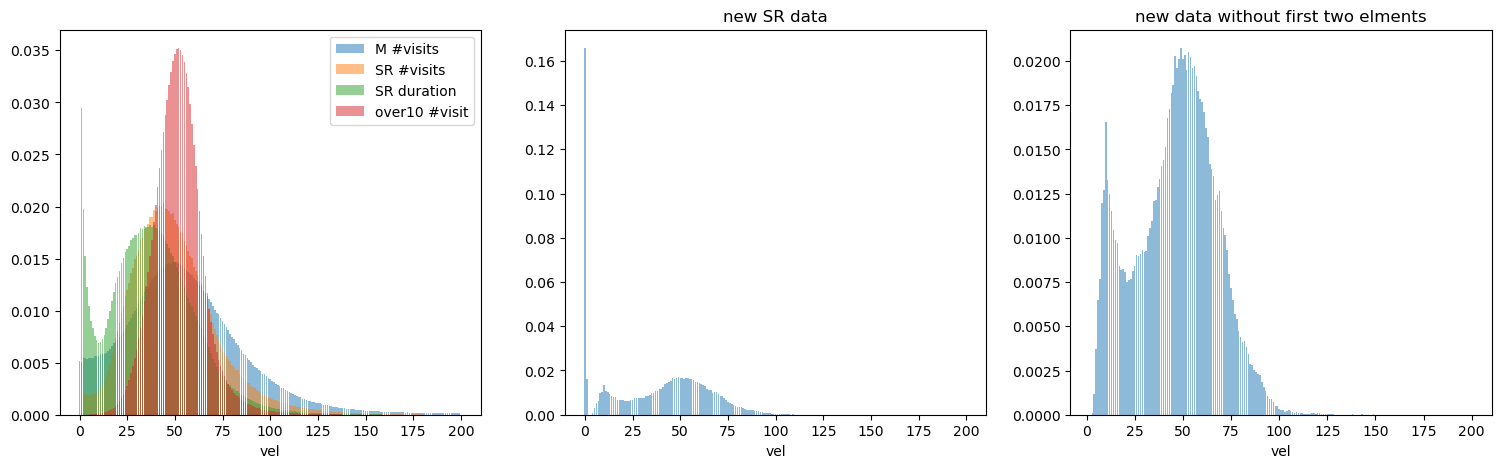

In [286]:
fig = plt.figure(figsize=(25, 5))

plt.subplot(141)
plt.xlabel("vel")
plt.bar(M_histo.index, M_histo["scaled_count"], alpha=0.5)
plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_count"], alpha=0.5)
plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_duration"], alpha=0.5)
plt.bar(SR_over10_histo.index, SR_over10_histo["scaled_count"], alpha=0.5)
plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("")

plt.subplot(142)
plt.xlabel("vel")
plt.bar(SR_new_histo.index, SR_new_histo["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_duration"], alpha=0.5)
#plt.bar(SR_over10_histo.index, SR_over10_histo["scaled_count"], alpha=0.5)
#plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("new SR data")

plt.subplot(143)
plt.xlabel("vel")
plt.bar(SR_new_histo.index[2::], SR_new_histo["wo_low"][2::], alpha=0.5)
#plt.xlabel([x/10 for x in SR_new_histo.index[2::]])
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_duration"], alpha=0.5)
#plt.bar(SR_over10_histo.index, SR_over10_histo["scaled_count"], alpha=0.5)
#plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("new data without first two elments")



plt.show()

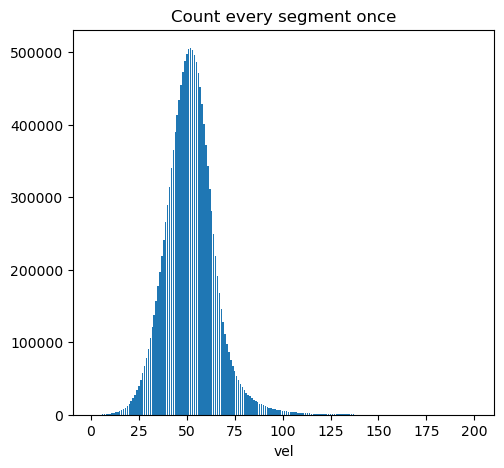

In [167]:
fig = plt.figure(figsize=(25, 5))

plt.subplot(141)
plt.xlabel("vel")
plt.bar(SR_over10_histo.index, SR_over10_histo["count"])
plt.title("Count every segment once")

plt.show()

## Clean up
We need to pick 
* acceleration (how we define it, and parameters for the cyclist), 
* timestep, and 
* velocity binsize 
in order to correctly scale the histograms.

The idea is that they should all contain an equal amount of datapoints at the end. 
And together acceleration, timestep and velocity bin size determines maximum velocity.
Since we will "cut away" all measured velocities above max velocity (cannot be reached anyway),
we must scale *after* determining maximum velocity

In [237]:
bin_size = 0.1 #[m/s]
max_vel = 20 #[m/s] #make sure max_vel/bin_size = integer
dt = 2 #[s]; time step; divisible by 60; (dt | 60)

### Input of cyclist - will determine acceleration
m_bike = 18.3 #[kg] mass of bike
m_human = 73.5 #mass of cyclist
mass = m_human+m_bike
level = "fit"


### Parameters
E_output = {"untrained": 1.5, "fit": 3.0, "highP": 5.0} #[W/kg]
P_max = m_human*E_output[level] #[W]

g = 9.81 # [m/s²]
RRcoef = 0.008 # [1]  % Rolling Resistance coefficient #####Changed!!! OK!
cw = 1 # [1]  
A = 0.5 # [m^2] % frontal area bike and cyclist
s = 0 #[rad] degree of slope
 
# Air density 
temp = 20 # [degree]
Temp = 273.15 + temp
rho = (10**(-5))*(Temp**2) - 0.0048*Temp + 1.2926 #which to use?

### Add limits on breaking here
decel = -2 #m/s^2


def acc_fun(v):
    #takes v=velocity as an argument
    #returns acceleration as a function of v
    if v == 0: #to avoid dividing with zero
        acc = 2
    else: 
        P_roll_steady = mass * g * RRcoef * v
        P_air_steady = 0.5 * cw * A * rho * (v**3)
        P_climb_steady = (mass)*g*s
        P_lost = P_roll_steady + P_air_steady + P_climb_steady

        P_acc = P_max - P_lost
        acc = P_acc/(mass*v)
    acc = min(2, acc) #max 2m/s
    acc = max(acc,0) #not negative
    return acc


v_max = 0
for i in range(int(max_vel/bin_size) + 1):
    v = i*bin_size
    a = acc_fun(v)
    if a > 0:
        v_max = i    

Now we know what is our max velocity (or rather which idx it corresponds to), so we can cut the histograms

In [244]:
M_cut = M_histo.iloc[:v_max+1]
SR_ones_cut = SR_ones_histo.iloc[:v_max+1]
SR_2to10_cut = SR_2to10_histo.iloc[:v_max+1]
SR_over10_cut = SR_over10_histo.iloc[:v_max+1]

SR_new_cut = SR_new_histo.iloc[:v_max+1]

In [245]:
M_cut["scaled_count"] = M_cut["count"]/sum(M_cut["count"])

SR_ones_cut["scaled_count"] = SR_ones_cut["count"]/sum(SR_ones_cut["count"])
SR_ones_cut["scaled_duration"] = SR_ones_cut["duration"]/sum(SR_ones_cut["duration"])

SR_2to10_cut["scaled_count"] = SR_2to10_cut["count"]/sum(SR_2to10_cut["count"])
SR_2to10_cut["scaled_duration"] = SR_2to10_cut["duration"]/sum(SR_2to10_cut["duration"])

SR_over10_cut["scaled_count"] = SR_over10_cut["count"]/sum(SR_over10_cut["count"])
SR_over10_cut["scaled_duration"] = SR_over10_cut["duration"]/sum(SR_over10_cut["duration"])

SR_new_cut["scaled_count"] = SR_new_cut["count"]/sum(SR_new_cut["count"])

SR_new_cut["wo_low"] = SR_new_cut["count"]/(sum(SR_new_cut["count"])-(SR_new_cut["count"][0]+SR_new_cut["count"][1]))


/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/1011750647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_cut["scaled_count"] = M_cut["count"]/sum(M_cut["count"])
/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/1011750647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SR_ones_cut["scaled_count"] = SR_ones_cut["count"]/sum(SR_ones_cut["count"])
/var/folders/3q/ktwh6dvs5b54vx_b6719ylx80000gn/T/ipykernel_4888/1011750647.py:4: SettingWithCopyWarning: 
A value is tryin

,count,scaled_count,wo_low
bin_ms,,,
0,29785,0.166868,0.204311
1,2926,0.016393,0.020071
2,0,0.000000,0.000000
3,13,0.000073,0.000089
4,175,0.000980,0.001200
...,...,...,...
89,339,0.001899,0.002325
90,326,0.001826,0.002236
91,275,0.001541,0.001886


In [317]:
T = 25*60/dt


H_M = (M_cut["scaled_count"]*T).tolist()
H_new = (SR_new_cut["scaled_count"]*T).tolist()
H_new_nolow = (SR_new_cut["wo_low"]*T).tolist()

H_over10_dur = (SR_over10_cut["scaled_duration"]*T).tolist()
H_over10_count = (SR_over10_cut["scaled_count"]*T).tolist()

H_2to10_dur = (SR_2to10_cut["scaled_duration"]*T).tolist()
H_2to10_count = (SR_2to10_cut["scaled_count"]*T).tolist()

H_ones_dur = (SR_ones_cut["scaled_duration"]*T).tolist()
H_ones_count = (SR_ones_cut["scaled_count"]*T).tolist()


print("H_M =", H_M,
     "\nH_new =", H_new,
"\nH_new_nolow =", H_new_nolow,
"\nH_over10_dur =", H_over10_dur,
"\nH_over10_count =", H_over10_count,
"\nH_2to10_dur =", H_2to10_dur,
"\nH_2to10_count =", H_2to10_count,
"\nH_ones_dur =", H_ones_dur,
"\nH_ones_count =", H_ones_count)

H_M = [4.284176287754036, 4.242273917548089, 4.593669143042608, 4.560147246877851, 4.48979024388089, 4.523312140045647, 4.525650876987374, 4.593084458807176, 4.703005095068358, 4.743153412568009, 4.755236886766933, 4.825204100273607, 4.8579464174577875, 4.89965389291859, 4.980535212153324, 5.150483429918839, 5.313220542114026, 5.514546813847713, 5.749784771236446, 5.885431513856626, 6.0602521002507395, 6.216557685856176, 6.457252696108939, 6.672806284238134, 6.89381692523136, 7.200191464597629, 7.451605685833309, 7.764801541279616, 8.077802501980779, 8.37521188307043, 8.547109048287382, 8.897724694801324, 9.183440391182337, 9.455513455403274, 9.860894525302664, 10.088141798140496, 10.29278128054163, 10.588046819434696, 10.90007330641014, 11.090485472415768, 11.258289847984697, 11.453574382618923, 11.58902623049396, 11.687837866281935, 11.869869558246375, 12.01077845898544, 12.126545937600941, 12.209960888522545, 12.132392779955259, 12.253422416689641, 12.284605575912673, 12.26842931206

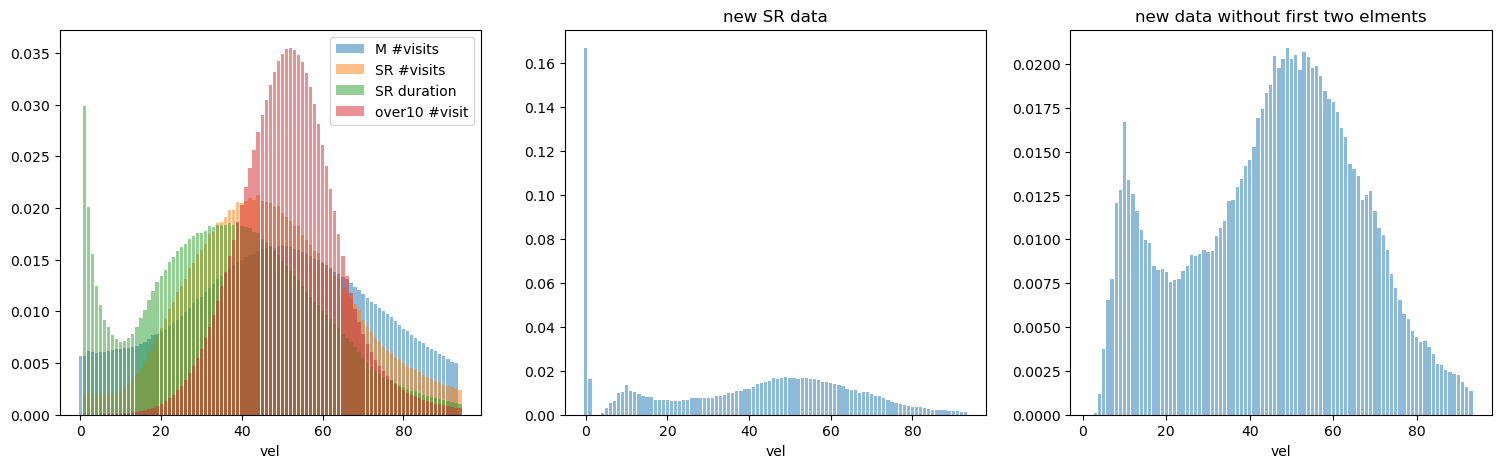

In [247]:
fig = plt.figure(figsize=(25, 5))

plt.subplot(141)
plt.xlabel("vel")
plt.bar(M_cut.index, M_cut["scaled_count"], alpha=0.5)
plt.bar(SR_ones_cut.index, SR_ones_cut["scaled_count"], alpha=0.5)
plt.bar(SR_ones_cut.index, SR_ones_cut["scaled_duration"], alpha=0.5)
plt.bar(SR_over10_cut.index, SR_over10_cut["scaled_count"], alpha=0.5)
plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("")

plt.subplot(142)
plt.xlabel("vel")
plt.bar(SR_new_cut.index, SR_new_cut["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_duration"], alpha=0.5)
#plt.bar(SR_over10_histo.index, SR_over10_histo["scaled_count"], alpha=0.5)
#plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("new SR data")

plt.subplot(143)
plt.xlabel("vel")
plt.bar(SR_new_cut.index[2::], SR_new_cut["wo_low"][2::], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_count"], alpha=0.5)
#plt.bar(SR_ones_histo.index, SR_ones_histo["scaled_duration"], alpha=0.5)
#plt.bar(SR_over10_histo.index, SR_over10_histo["scaled_count"], alpha=0.5)
#plt.legend(["M #visits", "SR #visits", "SR duration", "over10 #visit"])
plt.title("new data without first two elments")



plt.show()

## mean max vel of Montreal dataset

not related to the above

In [290]:
max_vel = []
#df_M.drop([])

for i in range(4881):
    if i == 938: #this is all NaN for some reason
        lllk=0
    else:
        max_vel.append(df_M.loc[df_M["trip_id"] == i]["vel"].nlargest(n=3).tolist())

In [294]:
third_vel = []
top_vel = []
for lis in max_vel:
    third_vel.append(lis[-1])
    top_vel.append(lis[0])


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

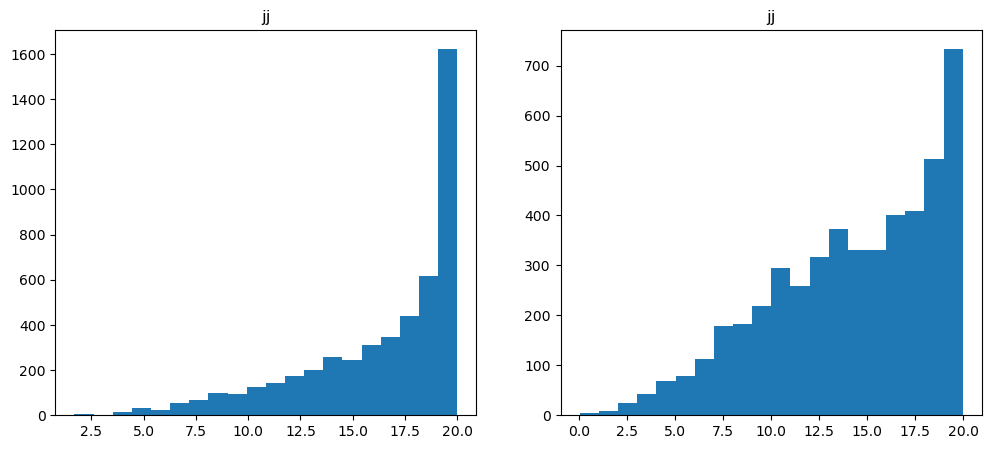

In [300]:
fig = plt.figure(figsize=(25, 5))

plt.subplot(141)
plt.hist(top_vel, bins=20)
plt.title("jj")

plt.subplot(142)
plt.hist(third_vel, bins=20)
plt.title("jj")

plt.plot

In [296]:
print(np.mean(top_vel))
print(np.mean(third_vel))

16.39734199006474
14.182802804548638


,count,scaled_count,wo_low
bin_ms,,,
0,29785,0.165789,0.202695
1,2926,0.016287,0.019912
2,0,0.000000,0.000000
3,13,0.000072,0.000088
4,175,0.000974,0.001191
...,...,...,...
196,0,0.000000,0.000000
197,0,0.000000,0.000000
198,0,0.000000,0.000000


In [319]:
#all scaled to contain T = 250
#Montreal
H_M = [4.284176287754036, 4.242273917548089, 4.593669143042608, 4.560147246877851, 4.48979024388089, 4.523312140045647, 4.525650876987374, 4.593084458807176, 4.703005095068358, 4.743153412568009, 4.755236886766933, 4.825204100273607, 4.8579464174577875, 4.89965389291859, 4.980535212153324, 5.150483429918839, 5.313220542114026, 5.514546813847713, 5.749784771236446, 5.885431513856626, 6.0602521002507395, 6.216557685856176, 6.457252696108939, 6.672806284238134, 6.89381692523136, 7.200191464597629, 7.451605685833309, 7.764801541279616, 8.077802501980779, 8.37521188307043, 8.547109048287382, 8.897724694801324, 9.183440391182337, 9.455513455403274, 9.860894525302664, 10.088141798140496, 10.29278128054163, 10.588046819434696, 10.90007330641014, 11.090485472415768, 11.258289847984697, 11.453574382618923, 11.58902623049396, 11.687837866281935, 11.869869558246375, 12.01077845898544, 12.126545937600941, 12.209960888522545, 12.132392779955259, 12.253422416689641, 12.284605575912673, 12.268429312065727, 12.164355518158862, 12.03591988110901, 11.933795034653585, 11.784895449363617, 11.65295170690117, 11.508144911259226, 11.292201533639743, 11.219895583191342, 11.02324678534111, 10.835368251022352, 10.64027861113327, 10.343453914279054, 10.23333838327273, 9.981729267291906, 9.818017681371, 9.534640721931714, 9.282836711205746, 9.073519754921156, 8.754282162375388, 8.449856570460557, 8.210720718168947, 8.0707862911556, 7.745312066765223, 7.551002005856716, 7.301536732072476, 7.066493669428889, 6.792081868266225, 6.517475172358417, 6.255926424375252, 6.086173101354882, 5.794415667874407, 5.578862079745212, 5.36194422840001, 5.171921851884671, 4.894001945309416, 4.778039571948773, 4.596592564219768, 4.378700239148845, 4.25318802327615, 4.015806223690833, 3.8415703215321533, 3.7651715814357294] 

#new SR (with and without first two low vel (different scaling))
H_new = [125.15126558875929, 12.294530908601969, 0.0, 0.054623684829742176, 0.7353188342465292, 2.281589297119231, 4.004336280211099, 4.722847826817708, 7.399408383475075, 7.832196040203032, 10.218830885071768, 8.197754546371307, 7.701939560993647, 7.113684493596424, 6.437191166089616, 6.084238125651283, 5.991798043631719, 5.189250058825507, 5.067397223436082, 5.096809976805943, 5.0001680728763995, 4.6430132105280855, 4.710242361087768, 4.75226058018757, 5.03378264815624, 5.176644593095566, 5.584221318363642, 5.550606743083801, 5.613634071733504, 5.739688729032909, 5.680863222293186, 5.7102759756630475, 6.252311002050488, 6.504420316649298, 6.764933275068069, 7.454032068304817, 7.500252109314599, 7.958250697502437, 8.227167299741168, 8.701973175568927, 8.899458805337995, 9.357457393525833, 10.349087364281152, 10.676829473259605, 11.248277253016909, 11.508790211435677, 12.508823826010959, 12.105448922652862, 12.433191031631315, 12.80295135970957, 12.437392853541295, 12.571851154660662, 12.0340179501832, 12.660089414770244, 12.500420182190998, 12.118054388382802, 12.185283538942485, 11.83233049850415, 11.30710275975663, 11.0381861575179, 10.907929678308514, 10.56758210360012, 10.00873978957276, 9.689401324414266, 8.756596860398668, 8.596927627819422, 8.349020135130592, 7.504453931224579, 7.689334095263706, 7.815388752563111, 7.122088137416384, 6.525429426199199, 6.26491646778043, 5.764899660492789, 4.899324347036876, 4.428720293119096, 4.021143567851021, 3.5253285824733602, 3.3278429527042928, 2.916064405526236, 2.7059733100272276, 2.5463040774479815, 2.584120474637803, 2.361423913408854, 2.113516420720024, 1.7689670241016504, 1.7479579145517496, 1.554674106692662, 1.4958485999529396, 1.4244176274832767, 1.3697939426535346, 1.1555010252445461, 0.9706208612054186, 0.8109516286261723] 
H_new_nolow = [153.23288723650907, 15.053195502905004, 0.0, 0.06688022608946173, 0.9003107358196772, 2.7935355974290554, 4.902835035635157, 5.782567240350384, 9.059698318734009, 9.58959549467359, 12.511746911505456, 10.037178546195372, 9.430111878614104, 8.709863289958362, 7.881577413004259, 7.449428259810815, 7.336246338736341, 6.353621478498865, 6.204427127991605, 6.2404395574243905, 6.122113003573805, 5.684819217604248, 5.7671333420220465, 5.818579669783171, 6.163270065782704, 6.338187580170527, 6.837216959453435, 6.796059897244535, 6.87322938888622, 7.027568372169595, 6.95554351330402, 6.991555942736808, 7.655213570855313, 7.963891537422059, 8.282858769541031, 9.12657854482347, 9.183169505360707, 9.743934477956964, 10.07319097562816, 10.654534479328866, 10.89633221980615, 11.457097192402406, 12.671230527564942, 13.072511884101713, 13.772181941653006, 14.091149173771974, 15.315571774486736, 14.821687027979943, 15.222968384516715, 15.675696068814608, 15.228113017292825, 15.392741266128423, 14.734228270786032, 15.500778554426784, 15.305282508934512, 14.83712092630828, 14.91943505072608, 14.487285897532635, 13.844206800518577, 13.514950302847383, 13.355466686787898, 12.93875143192279, 12.254515272699834, 11.863523181715289, 10.721414705418328, 10.525918659926054, 10.22238532613542, 9.18831413813682, 9.414677980285767, 9.56901696356914, 8.720152555510587, 7.989614701302621, 7.670647469183649, 7.05843616882627, 5.9986418169471065, 5.422442946022513, 4.9234135667396055, 4.316346899158338, 4.074549158681053, 3.5703751466220344, 3.3131435078164118, 3.1176474623241397, 3.1639491573091516, 2.891283620175192, 2.5877502863845576, 2.165890398743338, 2.1401672348627754, 1.9035141271616032, 1.831489268296029, 1.7440305111021175, 1.6771502850126558, 1.4147740134309212, 1.188410171281974, 0.9929141257897012] 

#SR over 10 visits
H_over10_dur = [0.008413102951592253, 0.016742753351901143, 0.022489455648494295, 0.04903841111052105, 0.04902696615209263, 0.07752521931944631, 0.08342204457417524, 0.10458641019352355, 0.12519552341232149, 0.13116156637122925, 0.16723962709903384, 0.20022597716492122, 0.2500028367656602, 0.2871736072787169, 0.3250408728250832, 0.41190662353000346, 0.5067457301253492, 0.614744918116948, 0.7591555270623197, 0.913402168773775, 1.1037448131827328, 1.3643104445058225, 1.6547866793093526, 1.9755521604656843, 2.3408418257444508, 2.7819505565270055, 3.3216945323678275, 3.867861885811, 4.506195479191419, 5.188943632245337, 6.04560779802837, 6.911030559461519, 7.872340042742871, 8.950864577641179, 10.017478192254163, 11.06272445770299, 12.3543626877047, 13.559793364640766, 14.833548347394352, 16.133137409244274, 17.443636732257165, 18.855652637880933, 20.156028357764217, 21.4374669125531, 22.686951834113195, 23.795307545223544, 24.797228904675926, 25.745852208710428, 26.476143213068646, 26.881122285055447, 27.163591224370574, 27.088253239975433, 26.796558601794402, 26.22368532094284, 25.651502644615658, 24.727716116587764, 23.489435563376954, 22.15254910047271, 20.637935067011462, 19.02893163478205, 17.3853415894497, 15.647916817592838, 13.96815826888282, 12.228382236690434, 10.587312622601885, 9.10369714710636, 7.856351393309354, 6.755319932481846, 5.773857642127102, 4.93830325155745, 4.297172165032347, 3.759573362599614, 3.207034014384356, 2.7731381205052146, 2.440241513579037, 2.145222558063576, 1.8880268149689572, 1.6774470870550604, 1.4766811034760268, 1.3043484400274414, 1.1376939434378888, 1.0174367874707118, 0.91626442560101, 0.8247922327672891, 0.7385079863085243, 0.6436942137991941, 0.5832520992789328, 0.5261112852565388, 0.47381813994016597, 0.42250363316861783, 0.37932551713073626, 0.34777553386571597, 0.3116189952766607, 0.2781211919811664] 
H_over10_count = [0.0005262702532475611, 0.0008946594305208539, 0.0026839782915625615, 0.00799930784936293, 0.013262010381838541, 0.023103264117567933, 0.032155112473425985, 0.04878525247604892, 0.06162624665528941, 0.07657232184752014, 0.10462252634561514, 0.13330425514760724, 0.1683538540138948, 0.21313945256526223, 0.25366226206532444, 0.3279716218238801, 0.41685866759739315, 0.5171131508410536, 0.6486280871276191, 0.7911420717070586, 0.9683898930008372, 1.190686447972607, 1.4619787635217247, 1.759952980910494, 2.101765510394785, 2.4990469245713687, 2.9918990167377095, 3.5020654002358955, 4.112012623749819, 4.7783233913865555, 5.556308706762426, 6.339819859797394, 7.252951376207238, 8.252391214149682, 9.31029967722793, 10.340052681757431, 11.534107259350822, 12.700059005420796, 13.951108651440897, 15.244786187974052, 16.522728243935106, 17.875348048831984, 19.198707227648303, 20.49527925057432, 21.74932863703793, 22.877336297848753, 23.953506338714696, 24.88695188689989, 25.65478018638808, 26.18326077469928, 26.55180783304855, 26.611644760842797, 26.46271027917374, 26.116898095764768, 25.63436090056208, 24.81758946752186, 23.761259815203356, 22.5381551196307, 21.117172808836962, 19.604198457775546, 18.078225231458923, 16.3994231235992, 14.802456040119475, 13.09081466845711, 11.485900904153345, 10.05886648544726, 8.808448363731053, 7.681387989376078, 6.7148400422616055, 5.831758557312199, 5.158922038535192, 4.573762143949229, 3.974024563348308, 3.5164852051748783, 3.141149260558718, 2.7891797151867492, 2.513150967358403, 2.2604359917489245, 2.0206672643693357, 1.8093171306651152, 1.6102817208868876, 1.4630839310535446, 1.3299901840072363, 1.2130529337356284, 1.1006942346672741, 0.9734420874320138, 0.8933963819130597, 0.8090352603174756, 0.7454618137251704, 0.676046767321817, 0.6165782287048426, 0.5680561113554174, 0.5144817995748158, 0.47374848197345454] 

#SR 2-10 visits
H_2to10_dur = [11.50359689039278, 7.887737577047108, 6.180679405065726, 5.058553361016373, 4.321113887152223, 3.810698940216767, 3.5400114994589034, 3.2692917833717305, 3.1670284642598054, 3.109617356089125, 3.185264076437886, 3.3950835918602826, 3.6313382321039254, 4.000013935760139, 4.468340647682031, 4.941031449424703, 5.558561355312175, 6.147827793292214, 6.713594464919014, 7.199983327688591, 7.744371558208784, 8.335130506211268, 8.873974766156875, 9.420243126269042, 9.915374458893789, 10.402393326121379, 10.990773256095524, 11.455412610867773, 11.92066824792679, 12.325333058001727, 12.788861260843849, 13.311881735543759, 13.676763217444348, 14.146165895641204, 14.460409369232007, 14.82593489182468, 15.226339772887394, 15.442993553028078, 15.77187075942706, 15.901069427320532, 16.114782719246627, 16.241088229156066, 16.24121011559315, 16.31346850778167, 16.150649984211707, 16.093459543814276, 15.89659764992822, 15.667285225977459, 15.40933826026588, 15.045223836243965, 14.668003321298729, 14.228993990325161, 13.800447706420039, 13.357506493053537, 12.76735844575695, 12.214820642534061, 11.670628169311131, 11.115302919921096, 10.601944648089017, 9.991165087803102, 9.43801980440207, 8.88039412322252, 8.347918639401515, 7.81623152047937, 7.25176974228691, 6.732467425360856, 6.2413162159551305, 5.750316005363913, 5.274949269205827, 4.7507190779140265, 4.341525447761046, 3.9688637515546423, 3.619872559590811, 3.329813384588543, 3.043560560218649, 2.8236347567231754, 2.6226723067292044, 2.4215685996262493, 2.260330423397064, 2.0656350560502204, 1.9243925327376576, 1.7772771577054496, 1.6949110665470217, 1.5453074278957437, 1.4251861598259217, 1.3370009836022447, 1.2259430693731297, 1.1397035797875281, 1.0667590182815174, 0.9793988994393854, 0.9143531769383254, 0.8520448632501133, 0.7877902210157728, 0.7337448405391556] 
H_2to10_count = [0.6682589104054822, 0.7269713369097489, 0.7434501320023668, 0.750483951342925, 0.7508986088149666, 0.7630004639249228, 0.7982156336801631, 0.8335690225927506, 0.898900610965534, 0.984381480942711, 1.1087172918186052, 1.2902451184679469, 1.4939494410294416, 1.767469795735429, 2.0615387318337026, 2.4273126952268806, 2.8591707735161775, 3.2998902355598454, 3.775056983151269, 4.245217125709893, 4.770219558367063, 5.373791903134049, 5.920264378232485, 6.550973750891975, 7.134381456370416, 7.7404110306013525, 8.468764559084574, 9.057716388541055, 9.78582419407788, 10.363718490946583, 11.00995448228141, 11.772847442417286, 12.340528879326444, 13.098691672744215, 13.600918659807393, 14.215609967898756, 14.888967629441934, 15.280266063891897, 15.937912814549943, 16.286347952538122, 16.71660883167585, 17.114234631995487, 17.31492884846364, 17.739077369309793, 17.693004316860723, 17.843632483000885, 17.876851153816666, 17.802965335372505, 17.791953875837176, 17.481068275594996, 17.238677946660427, 16.928022711680487, 16.572845550350596, 16.290586673363435, 15.671103767817371, 15.185263429741912, 14.69168281885501, 14.102838493187576, 13.645102717106052, 12.934471956131572, 12.360171357353899, 11.779604823443147, 11.174988156153985, 10.614048742586538, 9.908501375065608, 9.331758904508131, 8.787282928349155, 8.19353950143797, 7.64077037583816, 6.956355181707205, 6.451194876971435, 5.964571297004342, 5.534801863759404, 5.165173121644654, 4.758732010623095, 4.47314051617545, 4.210739124793839, 3.9397681456567, 3.7171738715910854, 3.43066091609446, 3.231732833303519, 3.025709500435421, 2.9116172648873704, 2.693661011434963, 2.5006609947258025, 2.3853555021299266, 2.209832529983114, 2.0759903126185613, 1.9720802216617555, 1.8237249927757453, 1.7284612779952153, 1.620158889371598, 1.5159723601000976, 1.4323344122208832] 

#SR one visit
H_ones_dur = [22.430654660207377, 15.047902400428367, 11.648365836920059, 9.328405307293712, 7.958761162562693, 6.887886798867768, 6.374170729511321, 5.781870470935965, 5.49573812730202, 5.267658204096587, 5.330703139318455, 5.5815419432730495, 5.840374632557793, 6.341748276904306, 6.986049576930458, 7.589804231677377, 8.355484091979159, 9.014859168660854, 9.657030461909416, 10.053407744626012, 10.512040489693907, 11.075825446719596, 11.472940019206828, 11.880851978217994, 12.138540751038528, 12.355887333182434, 12.78641724908513, 12.962209099545383, 13.16046318652875, 13.18458371177558, 13.314988135112154, 13.665817613708008, 13.600176334670795, 13.804322006647428, 13.737789327003917, 13.77791416866147, 13.909962550780275, 13.783073024408967, 13.917403808015093, 13.672127316890085, 13.618383854904724, 13.522419804903242, 13.286720244645341, 13.166802957691772, 12.728335329082611, 12.530927738963966, 12.203210780100912, 11.875441933529501, 11.598247596691849, 11.187384838235873, 10.823387743592733, 10.449619268833764, 10.08493985847061, 9.799064534000433, 9.345833748518931, 8.936644271695258, 8.572293158254494, 8.214969667527908, 7.9414329085562265, 7.507899475825104, 7.222152133205883, 6.912551648588672, 6.591151108457207, 6.3018227293586015, 5.888348907955818, 5.600897788560808, 5.277278978433629, 4.928859213144572, 4.548643336281754, 4.095003547018218, 3.773299280716492, 3.470853906391599, 3.1960028435171255, 2.9700807363221102, 2.737289699017488, 2.569073811534854, 2.431060965524193, 2.273329089092688, 2.1479417437317063, 1.9850124437644276, 1.8796929951864991, 1.7475927780854867, 1.7035695705820744, 1.5616371403156024, 1.4511588815530487, 1.3782817486451042, 1.2803256068057243, 1.204449985107463, 1.138697951916656, 1.0556069113128281, 0.9901254479065671, 0.9287679500531862, 0.868717353902359, 0.8110115371289692] 
H_ones_count = [1.4414788145430464, 1.5329683275761503, 1.5369719205289765, 1.5211058299381464, 1.4959350927625075, 1.488817594179705, 1.5266293054008417, 1.5474257465724672, 1.6270527619675672, 1.7310720381308122, 1.9193891881341216, 2.2035330768694297, 2.5066940321306626, 2.9265523079057565, 3.3651681580709445, 3.9150319938975358, 4.5474143289184905, 5.122856675277028, 5.781892559678372, 6.304361440022199, 6.913686045259284, 7.650310078274197, 8.173001380448737, 8.883564988965158, 9.366146221001198, 9.866298777663529, 10.623422689409116, 11.001057887653943, 11.69534763222323, 11.92670340646942, 12.362205351004633, 13.09089633872413, 13.256563532299875, 13.926275664575423, 14.009424358956805, 14.3316765213542, 14.884357700369819, 14.853885909562196, 15.412794899837765, 15.336244719767524, 15.505322381414196, 15.716215347234831, 15.585764943521907, 15.936635381470985, 15.495758242693553, 15.45097731411009, 15.338135305328578, 15.108336483897377, 15.141959250640094, 14.627608767117275, 14.33742241864761, 14.09494555286579, 13.716791370349302, 13.680017627671491, 13.030323460160075, 12.708219578983153, 12.326988561141809, 11.918622079953533, 11.773232343277748, 11.117310364506379, 10.822341946676392, 10.497865565971873, 10.07641326707667, 9.844872141304885, 9.211266486215012, 8.857764056602502, 8.471194914824054, 8.005591882532407, 7.56968216464089, 6.858859063988635, 6.411457551510301, 5.976771153687702, 5.597653143238127, 5.309950505211417, 4.891723322861549, 4.64802313701081, 4.443395052755245, 4.199917288735219, 4.038439039637893, 3.720079259277968, 3.5687212034780647, 3.3750659295376537, 3.323315783591862, 3.077168957603285, 2.860567164794361, 2.772673471357777, 2.5912513981065572, 2.4701056409784448, 2.3631207404056984, 2.1884825329912125, 2.1056304010507803, 1.9774412859501023, 1.8770548996884957, 1.7793375753954401]


H_list = [H_M, H_new, H_new_nolow, H_over10_dur, H_over10_count, H_2to10_dur, H_2to10_count, H_ones_dur,H_ones_count]